In [44]:
print("hiii")

hiii


In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv("Housing.csv")

In [47]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Task
Perform exploratory data analysis (EDA) on the uploaded dataset. The EDA should include exploring the data, visualizing the data, identifying outliers, analyzing categorical variables, and performing correlation analysis. Each step of the EDA should be presented in a separate code cell.

## Explore the data

### Subtask:
Check the data types, missing values, and summary statistics.


**Reasoning**:
Print the data types, check for missing values, and display descriptive statistics for the DataFrame `df`.



In [48]:
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nDescriptive statistics:")
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad        

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Visualize the data

### Subtask:
Create plots to understand the distribution of features and relationships between them.


**Reasoning**:
Create the required plots to visualize the distribution of features and relationships between them.



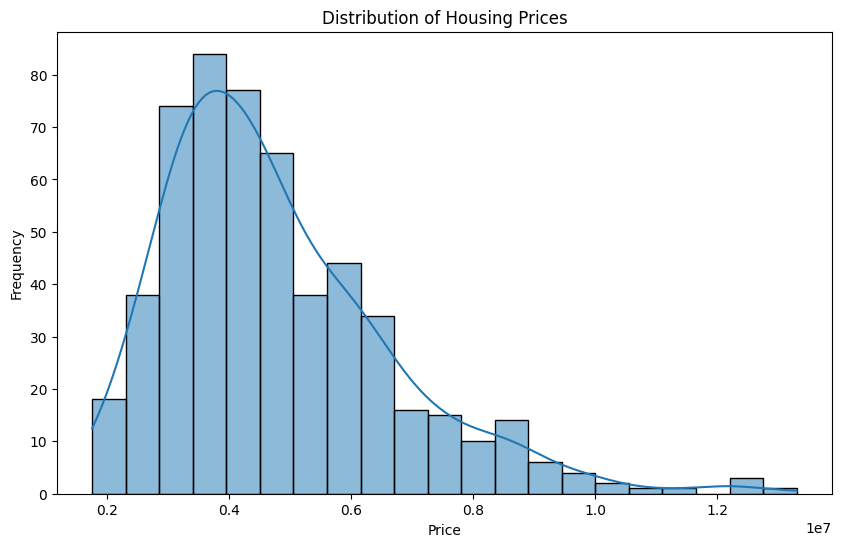

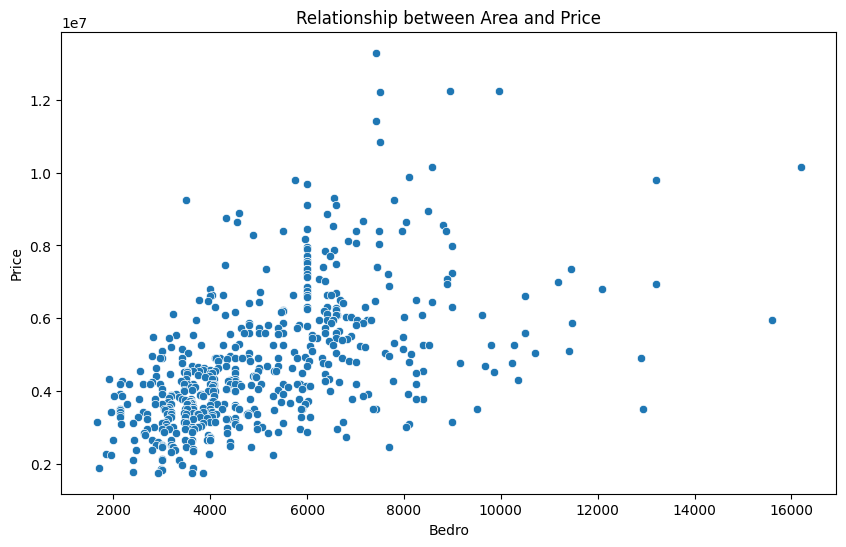

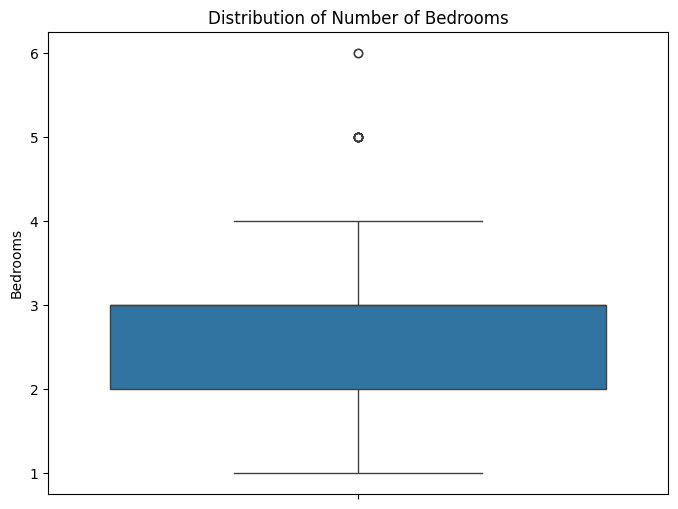

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot of 'area' vs. 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Relationship between Area and Price')
plt.xlabel('Bedro')
plt.ylabel('Price')
plt.show()

# 3. Box plot for 'bedrooms'
plt.figure(figsize=(8, 6))
sns.boxplot(y='bedrooms', data=df)
plt.title('Distribution of Number of Bedrooms')
plt.ylabel('Bedrooms')
plt.show()

## Identify outliers

### Subtask:
Detect and analyze any outliers in the dataset.


**Reasoning**:
Select numerical columns, create box plots, calculate IQR and bounds, and count outliers for each numerical column to detect and analyze outliers.



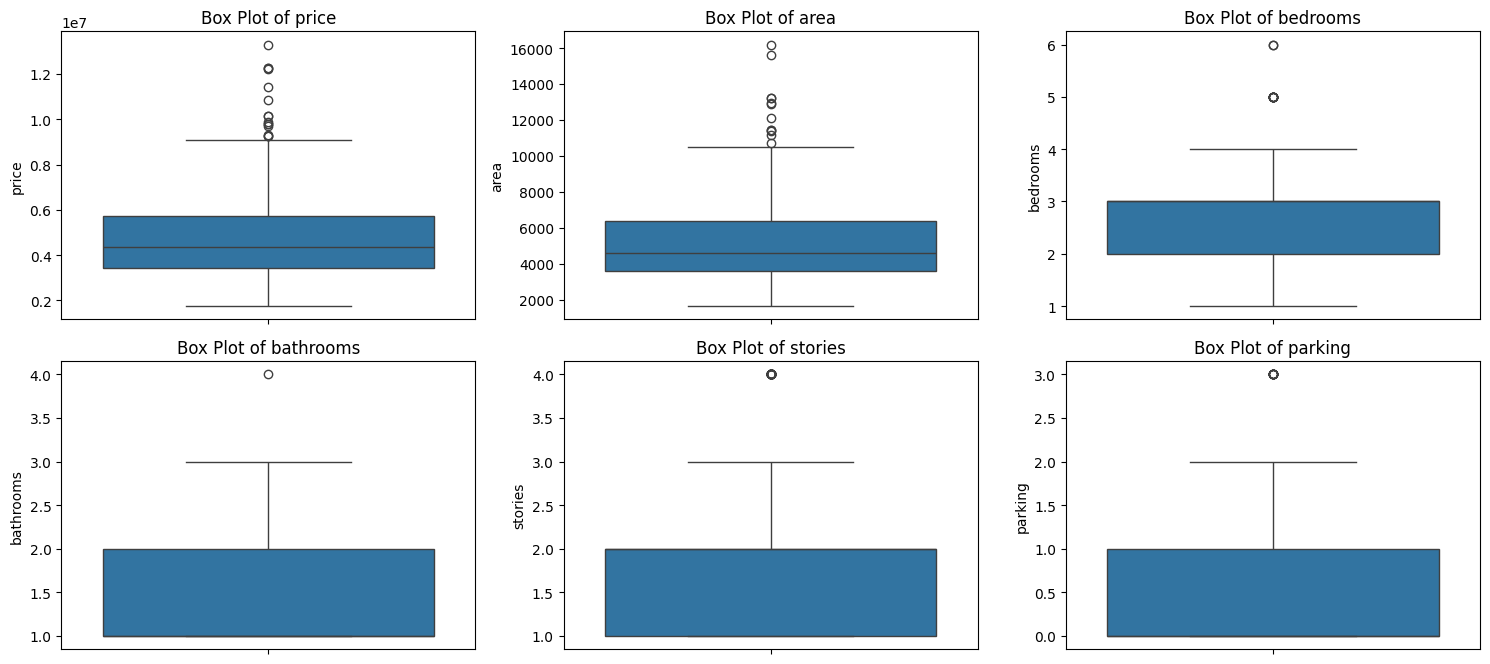


Number of outliers per numerical column (using IQR method):
price: 15
area: 12
bedrooms: 12
bathrooms: 1
stories: 41
parking: 12


In [50]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Create box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Detect and count outliers for each numerical column
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = col_outliers.shape[0]

print("\nNumber of outliers per numerical column (using IQR method):")
for col, count in outliers.items():
    print(f"{col}: {count}")

## Analyze categorical variables

### Subtask:
Explore the unique values and distribution of categorical features.


**Reasoning**:
Select categorical columns, print unique values, and calculate value counts for each to explore their distribution.



In [51]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Explore unique values and value counts for each categorical column
for col in categorical_cols:
    print(f"\nUnique values for {col}:")
    print(df[col].unique())

    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Unique values for mainroad:
['yes' 'no']

Value counts for mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64

Unique values for guestroom:
['no' 'yes']

Value counts for guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64

Unique values for basement:
['no' 'yes']

Value counts for basement:
basement
no     354
yes    191
Name: count, dtype: int64

Unique values for hotwaterheating:
['no' 'yes']

Value counts for hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

Unique values for airconditioning:
['yes' 'no']

Value counts for airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64

Unique values for prefarea:
['yes' 'no']

Value counts for prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64

Unique values for furnishingstatus:
['furnished' 'semi-furnished' 'unfurnished']

Value counts for furnishingstatus:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished     

**Reasoning**:
Calculate the correlation matrix and visualize it using a heatmap to understand the relationships between numerical features.



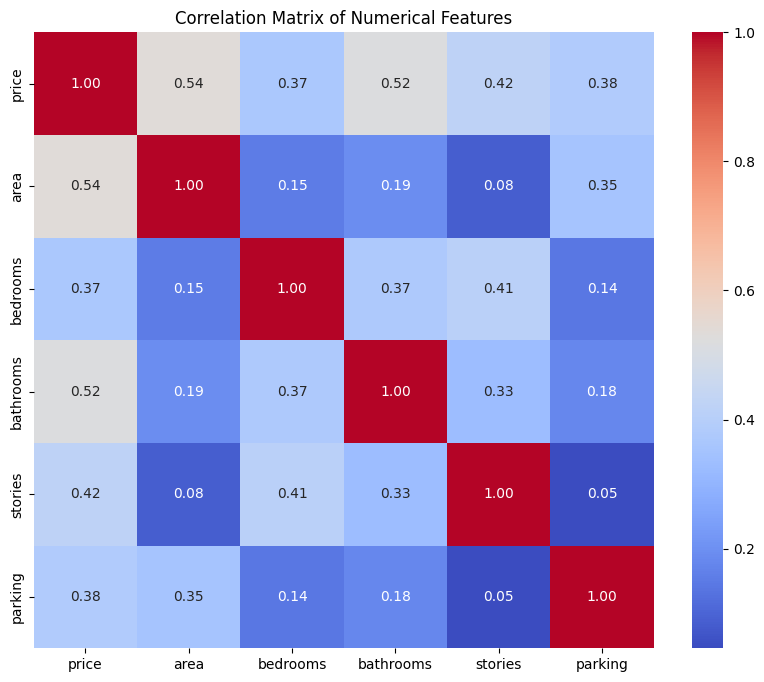

In [52]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [53]:
# Select features (X) and target (y)
X = df[['area', 'bathrooms', 'stories', 'airconditioning', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'prefarea', 'furnishingstatus']].copy()
y = df['price'].values.reshape(-1, 1)

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['airconditioning', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'prefarea', 'furnishingstatus'], drop_first=True)

# Convert X to a numpy array
X = X.values

In [54]:
X

array([[7420, 2, 3, ..., True, False, False],
       [8960, 4, 4, ..., False, False, False],
       [9960, 2, 2, ..., True, True, False],
       ...,
       [3620, 1, 1, ..., False, False, True],
       [2910, 1, 1, ..., False, False, False],
       [3850, 1, 2, ..., False, False, True]], dtype=object)

In [55]:
X.shape


(545, 11)

In [56]:
y.shape

(545, 1)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a column of ones for the intercept term after scaling
X = np.c_[np.ones((X.shape[0], 1)), X]

In [59]:
# This cell is no longer needed as the intercept term is added in the previous cell
# X=np.c_[np.ones((X.shape[0], 1)), X]

In [60]:
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = X.shape[0]
    theta = np.random.randn(X.shape[1], 1)

    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients

    return theta

In [61]:
def mean_squared_error_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [62]:
theta_batch = batch_gradient_descent(X, y)

In [63]:
y_pred_batch = X.dot(theta_batch)

In [64]:
print("Batch MSE:", mean_squared_error_manual(y, y_pred_batch))

Batch MSE: 1165789884854.463


In [65]:
def rmse_manual(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [66]:
print("Batch RMSE:", rmse_manual(y, y_pred_batch))

Batch RMSE: 1079717.502337747


In [67]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_epochs=10):
    m = X.shape[0]
    theta = np.random.randn(X.shape[1], 1)

    for epoch in range(n_epochs):
        for i in range(m):
            xi = X[i:i+1]  # shape: (1, n_features)
            yi = y[i:i+1]  # shape: (1, 1)
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

    return theta

In [68]:
theta_sgd = stochastic_gradient_descent(X, y)

In [69]:
y_pred_sgd = X.dot(theta_sgd)

In [70]:
print("Stochastic Gradient Descent MSE:", mean_squared_error_manual(y, y_pred_sgd))

Stochastic Gradient Descent MSE: 3564455792230.7793


In [71]:
# Normalize the target variable (price)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

display(y)

array([[ 4.56636513e+00],
       [ 4.00448405e+00],
       [ 4.00448405e+00],
       [ 3.98575468e+00],
       [ 3.55497918e+00],
       [ 3.25530927e+00],
       [ 2.88072189e+00],
       [ 2.88072189e+00],
       [ 2.73088693e+00],
       [ 2.69342819e+00],
       [ 2.69342819e+00],
       [ 2.62974834e+00],
       [ 2.43121702e+00],
       [ 2.39375829e+00],
       [ 2.39375829e+00],
       [ 2.31884081e+00],
       [ 2.31884081e+00],
       [ 2.24392333e+00],
       [ 2.20646459e+00],
       [ 2.18773522e+00],
       [ 2.13154711e+00],
       [ 2.09408838e+00],
       [ 2.07535901e+00],
       [ 2.07535901e+00],
       [ 2.03790027e+00],
       [ 2.01917090e+00],
       [ 1.97796629e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.88806531e+00],
       [ 1.83187721e+00],
       [ 1.79441847e+00],
       [ 1.77351649e+00],
       [ 1.75321385e+00],
       [ 1.71950099e+00],
       [ 1.7

## Retrain and evaluate models with normalized target

### Subtask:
Retrain Batch Gradient Descent and Stochastic Gradient Descent models using the normalized 'price' and evaluate their performance.

**Reasoning**:
Retrain the Batch Gradient Descent model using the normalized target variable `y` and evaluate its performance using MSE and RMSE to see the effect of normalization.

In [72]:
# Retrain Batch Gradient Descent with normalized y
theta_batch_normalized = batch_gradient_descent(X, y)
y_pred_batch_normalized = X.dot(theta_batch_normalized)

print("Batch MSE (Normalized y):", mean_squared_error_manual(y, y_pred_batch_normalized))
print("Batch RMSE (Normalized y):", rmse_manual(y, y_pred_batch_normalized))

Batch MSE (Normalized y): 0.33383394984098147
Batch RMSE (Normalized y): 0.5777836531444807


In [73]:
# Retrain Stochastic Gradient Descent with normalized y
theta_sgd_normalized = stochastic_gradient_descent(X, y)
y_pred_sgd_normalized = X.dot(theta_sgd_normalized)

print("Stochastic Gradient Descent MSE (Normalized y):", mean_squared_error_manual(y, y_pred_sgd_normalized))
print("Stochastic Gradient Descent RMSE (Normalized y):", rmse_manual(y, y_pred_sgd_normalized))

Stochastic Gradient Descent MSE (Normalized y): 1.0207125414120461
Stochastic Gradient Descent RMSE (Normalized y): 1.0103031928149322
